#ELENA GHINI RACHMAN, NIM 2502055204
##MID EXAM Deep Learning Even Semester 2022/2023




# A
## [LO 3, LO 4, 5 poin] Dataset yang diberikan memiliki beberapa problem, lakukan praproses data untuk menyelesaikan problem dari data tersebut. Sebutkan problem apa saja yang kalian temukan dari data yang diberikan, berikan penjelasan mengenai pendekatan apa yang kalian gunakan dan kenapa memilih pendekatan yang dipilih?


In [ ]:
# Mengimport library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf

# import data ke dara frame pandas
from google.colab import drive
drive.mount('/content/drive')
path ="/content/drive/MyDrive/insurance.csv"
df = pd.read_csv(path)

# view 5 fist list data untuk memastikan data sudah terbaca dengan baik atau tidak
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


Dari result di atas bisa dilihat bahwa dataset berhasil dimuat ke Python untuk kemudian dianalisis lebih lanjut.

In [ ]:
# cek terdapat nilai yang hilang atau tidak
missing_values = df.isnull().sum()
print(missing_values)

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64


Dari hasil yang diperoleh di atas, dapat disimpulkan bahwa setiap atribut memiliki nilai yang tersedia. Oleh karena itu, tidak ada baris data yaang memiliki atribut yang kosong. Dengan demikian, kebutuhan untuk mengisi nilai yang hilang dapat dikurangi.



In [ ]:
# view informasi mengenai setiap atribut yang ada pada dataset
df.info()

# view informasi mengenai basic statistika dari dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000



Dapat dilihat bahwa atribut-atribut seperti `age`, `steps`, `bmi` dan `charges` memiliki nilai standar deviasi di atas 5, sehingga memerlukan pemrosesan lanjutan. Standar deviasi yang tinggi menunjukkan bahwa data pada dataset tersebar dalam rentang nilai yang luas dari rata-ratanya. Karena heterogenitas data yang tinggi ini, performa model deep learning akan sangat dipengaruhi oleh distribusi nilai-nilai tersebut. Oleh karena itu, salah satu masalah yang ditemukan pada dataset adalah nilai `std` yang tinggi, yang menandakan adanya outliers yang dapat memengaruhi data. Oleh karena itu, pendekatan yang tepat adalah dengan melakukan normalisasi data numerik dan melakukan transformasi data sebelum dilakukan analisis lebih lanjut.

In [ ]:
# Menempatkan kolom numerik dalam satu frame
numerical_columns = ['age', 'bmi', 'steps', 'children', 'charges']

# Buat objek scaler MinMax
scaler = MinMaxScaler()

# Normalisasi kolom numerik yang diidentifikasi
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Tampilkan dataset yang telah dinormalisasi
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,0.021739,0,0.321227,0.001284,0.0,1,3,0.251611,1
1,0.000000,1,0.479150,0.001141,0.2,0,2,0.009636,1
2,0.217391,1,0.458434,0.001284,0.6,0,2,0.053115,0
3,0.326087,1,0.181464,0.999857,0.0,0,1,0.333010,0
4,0.304348,1,0.347592,0.714693,0.0,0,1,0.043816,1


Setelah data dinormalisasi didapatkan deskripsi informasi pada data seperti di atas.

In [ ]:
# Menampilkan statistik data baru
df.describe()


,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.505232,0.395572,0.332186,0.218984,0.204783,1.515695,0.193916,0.585202
std,0.305434,0.500160,0.164062,0.350020,0.241099,0.403694,1.104885,0.193301,0.492871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.278080,0.001141,0.000000,0.000000,1.000000,0.057757,0.000000
50%,0.456522,1.000000,0.388485,0.143652,0.200000,0.000000,2.000000,0.131849,1.000000
75%,0.717391,1.000000,0.504002,0.713837,0.400000,0.000000,2.000000,0.247700,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


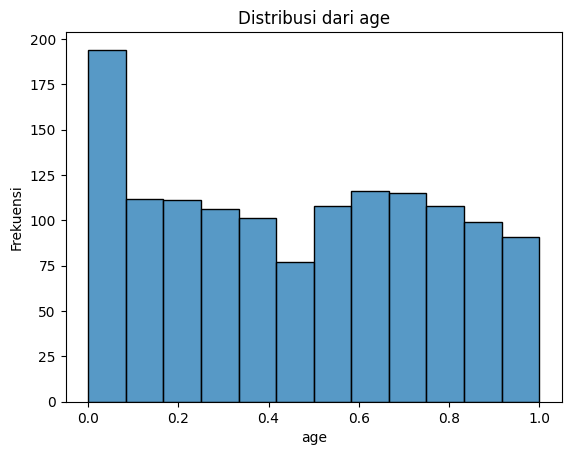

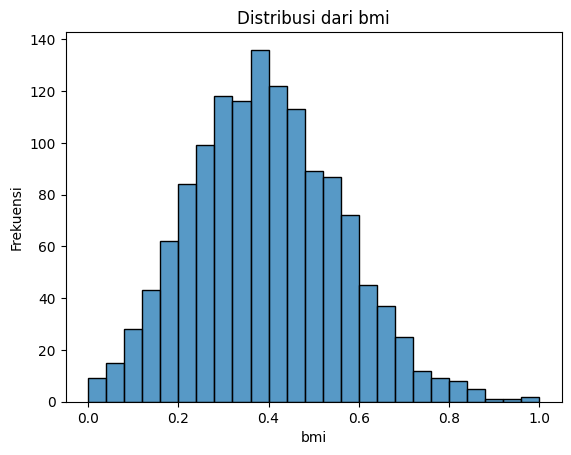

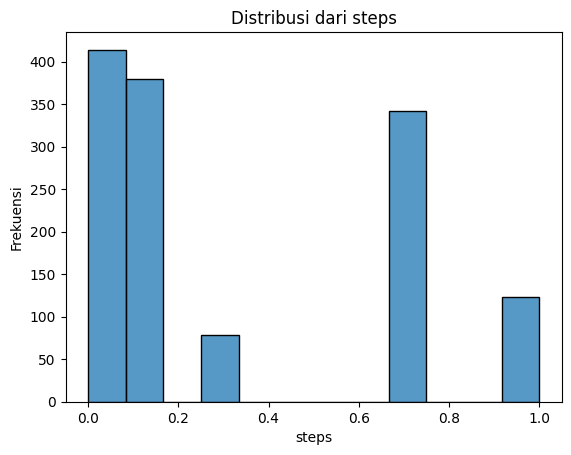

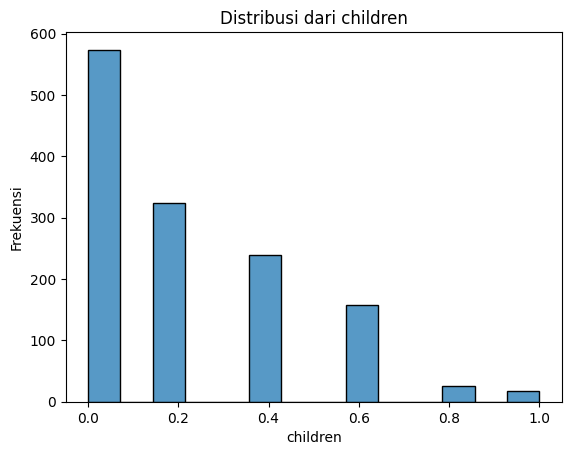

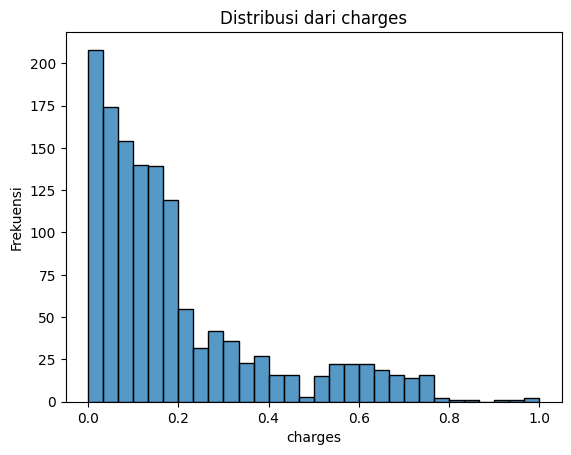

In [ ]:
# view distribusi data yang sudah dinormalisasi

for column in numerical_columns:
    plt.figure()
    sns.histplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.title(f'Distribusi dari {column}')
    plt.show()

Kita akan melakukan trans box-cox, terutama untuk kolom `charges`, `age`, dan `steps`. Untuk meningkatkan distribusi data yang masih kurang condong ke bentuk distribusi normal. Berikut adalah implementasinya. Berikut ini implementasinya.

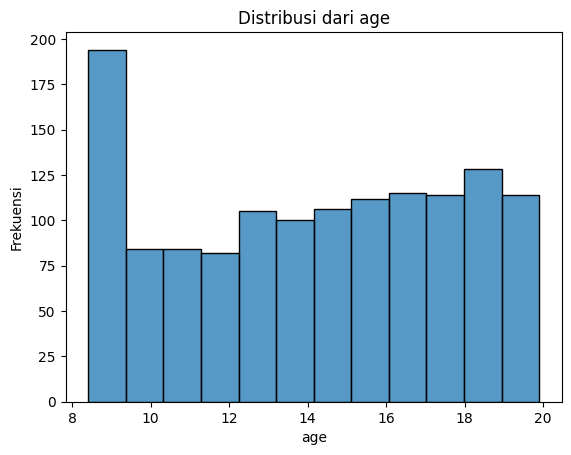

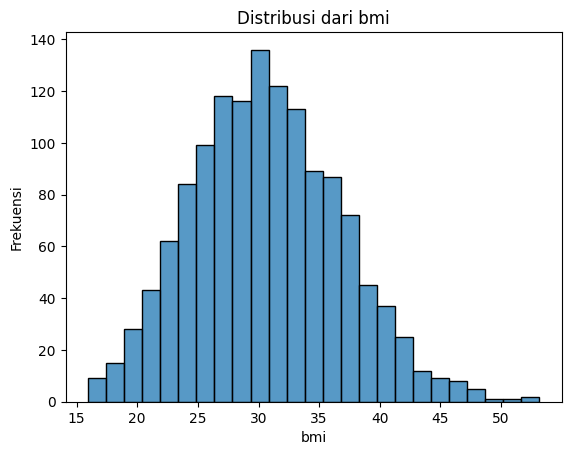

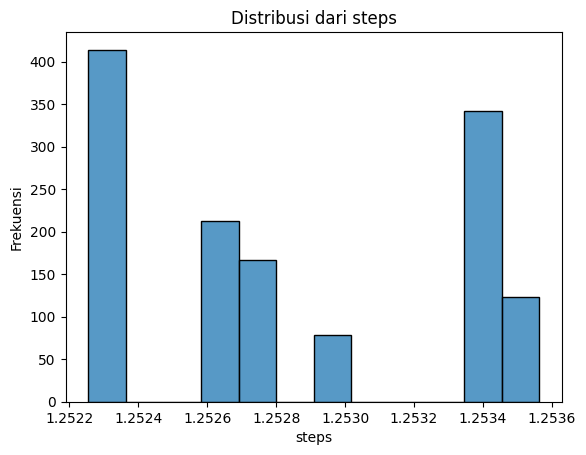

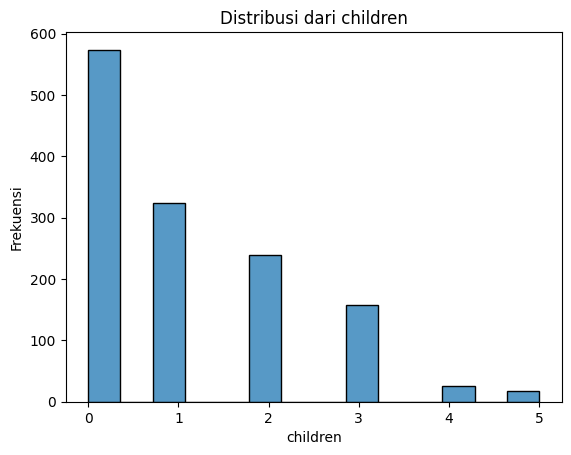

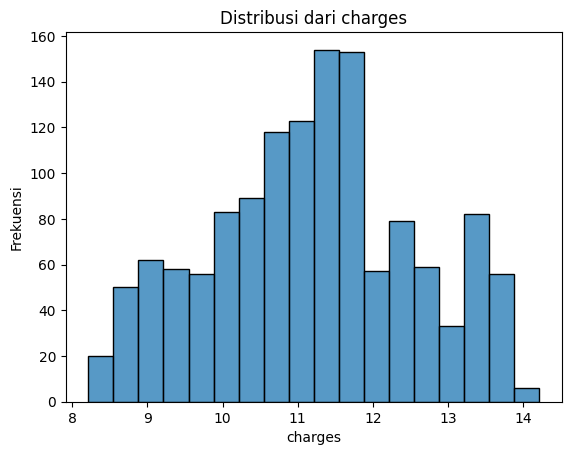

In [ ]:
df['charges'] = df['charges'] + 1
df['age'] = df['age'] + 1
df['steps'] = df['steps'] + 1

# Melakukan transformasi Box-Cox pada kolom 'charges'
df['charges'], _ = boxcox(df['charges'])

# Melakukan transformasi Box-Cox pada kolom 'age'
df['age'], _ = boxcox(df['age'])

# Melakukan transformasi Box-Cox pada kolom 'steps'
df['steps'], _ = boxcox(df['steps'])

# Menampilkan distribusi data yang sudah dinormalisasi

for column in numerical_columns:
    plt.figure()
    sns.histplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.title(f'Distribusi dari {column}')
    plt.show()

Untuk memastikan bahwa *dataset* hasil transformasi ini sudah dapat diproses dengan lebih baik, dataset harus dipastikan terlebih dahulu apakah masih ada *outliers* atau tidak. Apabila iya, digunakan dua metode untuk memangkas *outliers* tersebut, yakni dengan metode IQR dan metode Z-Score. Berikut adalah implementasinya.

Sebelum memproses *dataset* yang telah di-transformasi, perlu memastikan apakah masih terdapat *outliers* atau tidak. Jika ditemukan *outliers*, terdapat dua metode yang dapat digunakan untuk mengatasi masalah ini, yaitu metode IQR dan metode Z-Score. Berikut merupakan implementasinya.

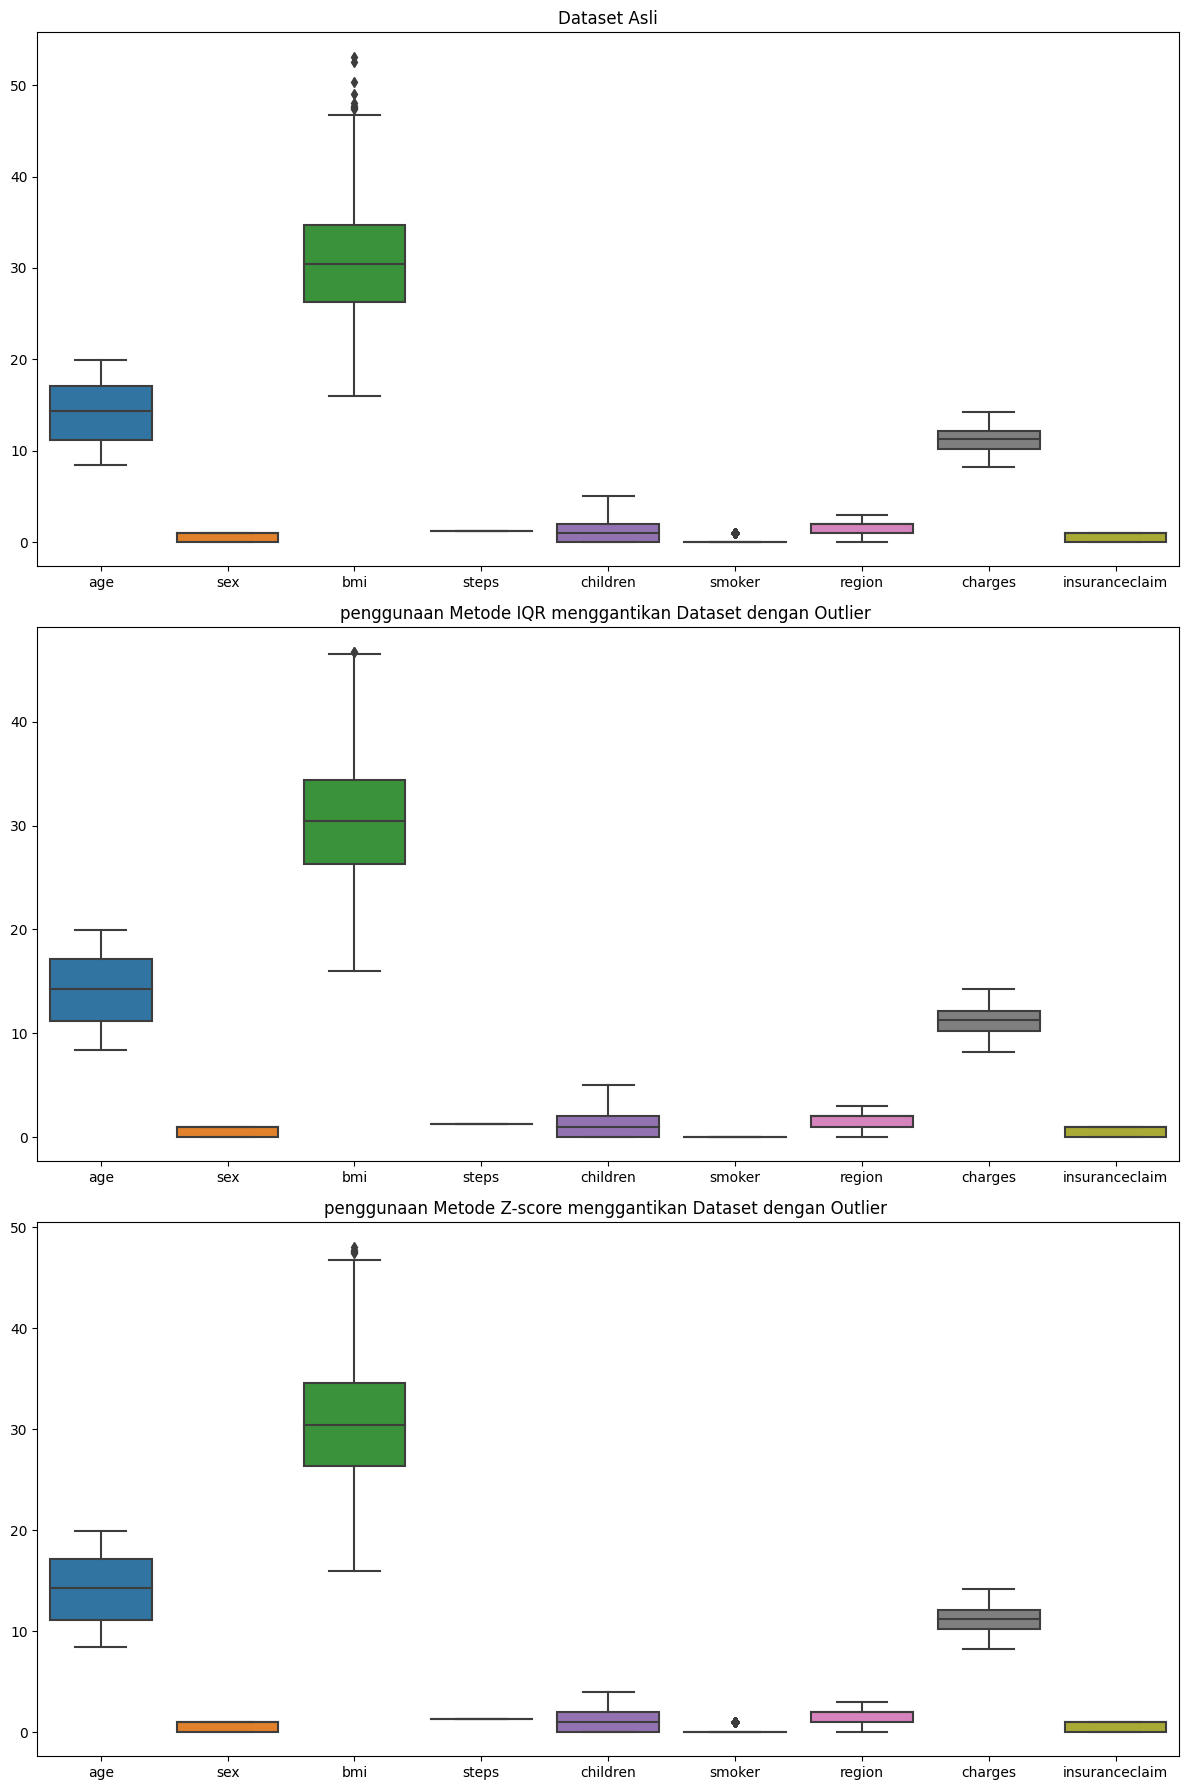

In [ ]:
# Fungsi untuk menggantikan outlier dengan metode IQR
def replace_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    for column in df.columns:
        median = df[column].median()
        df[column] = np.where((df[column] < lower_bound[column]) | (df[column] > upper_bound[column]), median, df[column])
    return df

from scipy import stats

#tes tes tes tes

def replace_outliers_z_score(df, threshold=3):
    for column in df.columns:
        column_data = df[column]
        median = column_data.median()
        z_scores = (column_data - column_data.mean()) / column_data.std()
        df[column] = np.where(np.abs(z_scores) > threshold, median, column_data)
    return df

# Menggantikan outlier dengan median menggunakan metode IQR
df_iqr = replace_outliers_iqr(df.copy())

# Menggantikan outlier dengan median menggunakan metode Z-score
df_z_score = replace_outliers_z_score(df.copy())

# Membuat boxplot untuk dataset asli
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
sns.boxplot(data=df, ax=axes[0])
axes[0].set_title('Dataset Asli')

# Membuat boxplot untuk dataset dengan outlier yang digantikan menggunakan metode IQR
sns.boxplot(data=df_iqr, ax=axes[1])
axes[1].set_title('penggunaan Metode IQR menggantikan Dataset dengan Outlier ')

# Membuat boxplot untuk dataset dengan outlier yang digantikan menggunakan metode Z-score
sns.boxplot(data=df_z_score, ax=axes[2])
axes[2].set_title('penggunaan Metode Z-score menggantikan Dataset dengan Outlier ')

plt.tight_layout()
plt.show()


Terlihat bahwa penerapan metode IQR sangat efektif dalam memangkas *outliers*. Oleh karena itu, untuk proses berikutnya, digunakan *dataframe* yang telah diproses menggunakan metode IQR.

#B
##[LO 3, LO 4, 5 poin] Lakukan eksplorasi data terlebih dahulu untuk memahami permasalahan yang dihadapi terlebih dahulu. Selanjutnya pisahkan dataset menjadi train, test dan validation set dengan ketentuan (80 train, 10 val, 10 test)


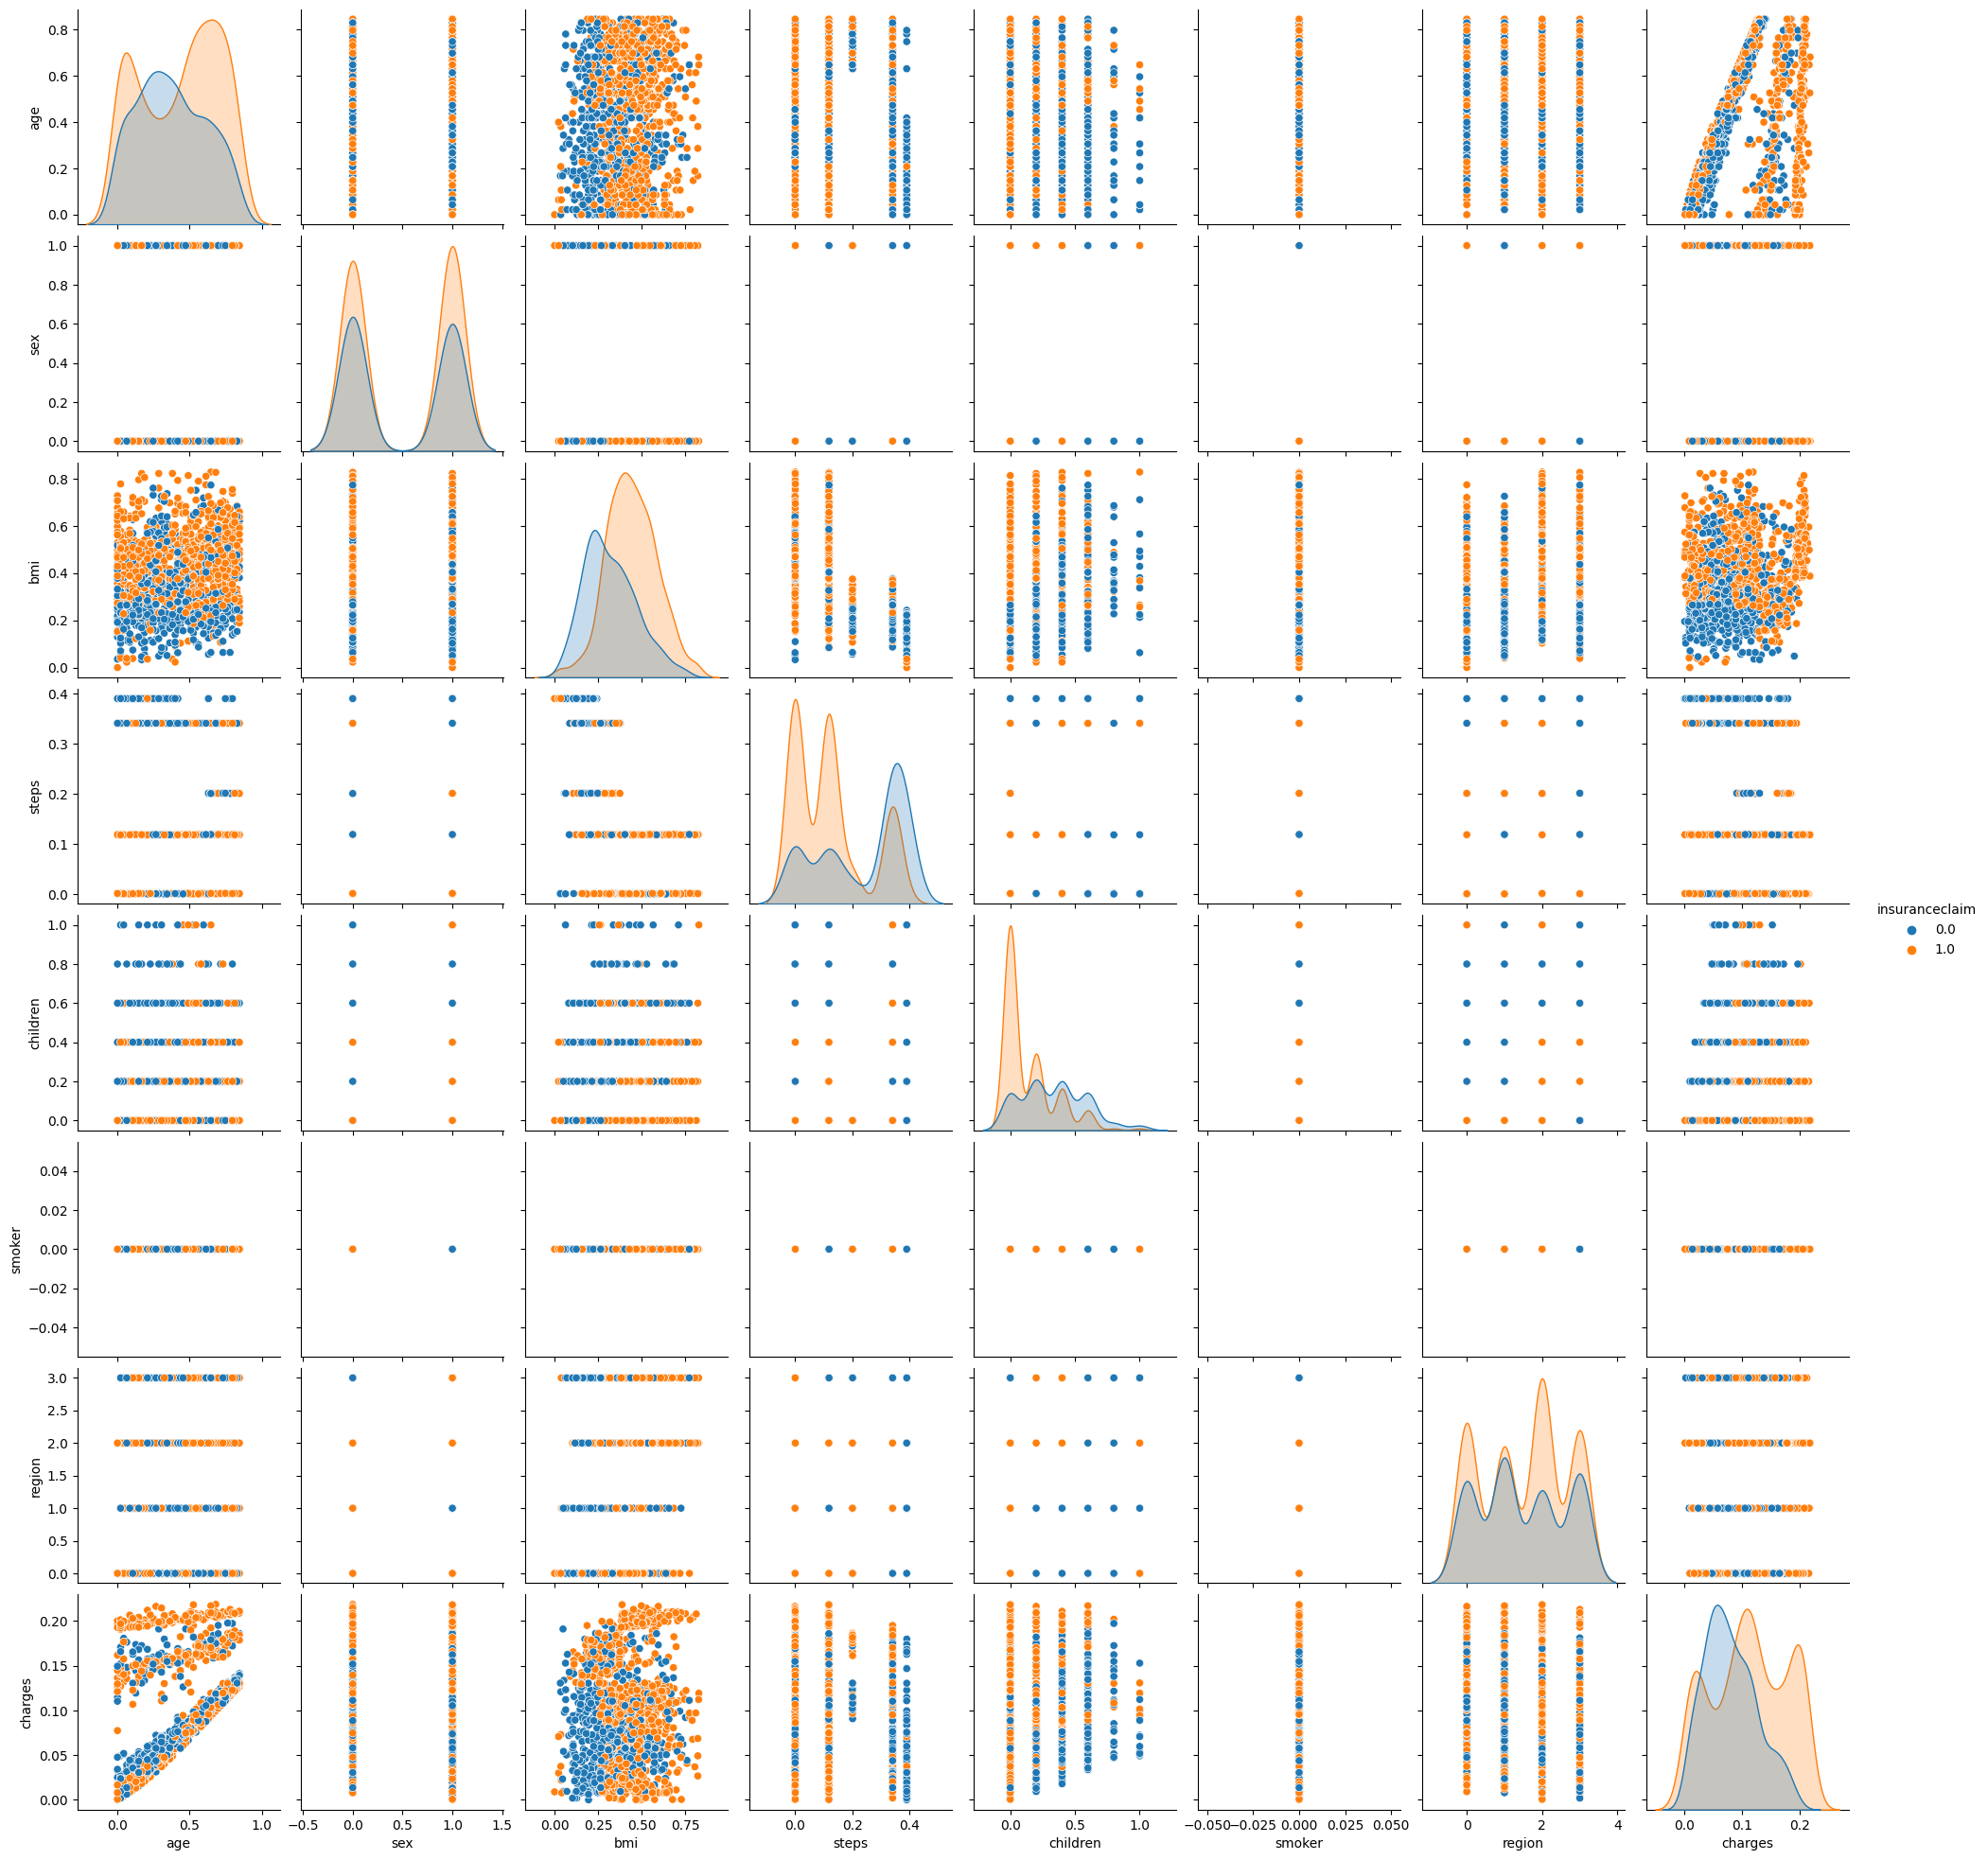

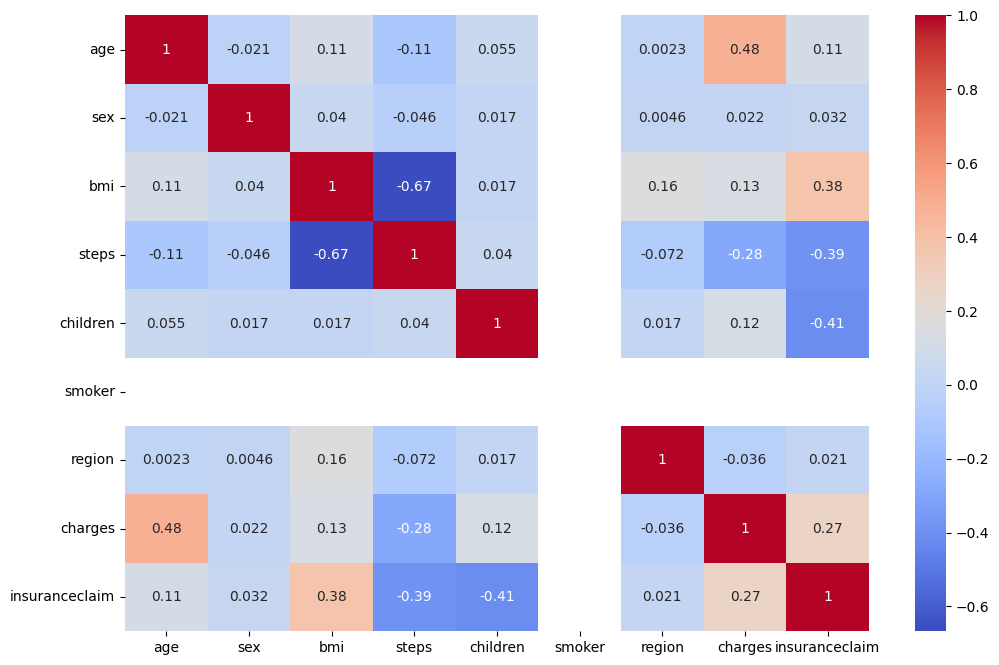

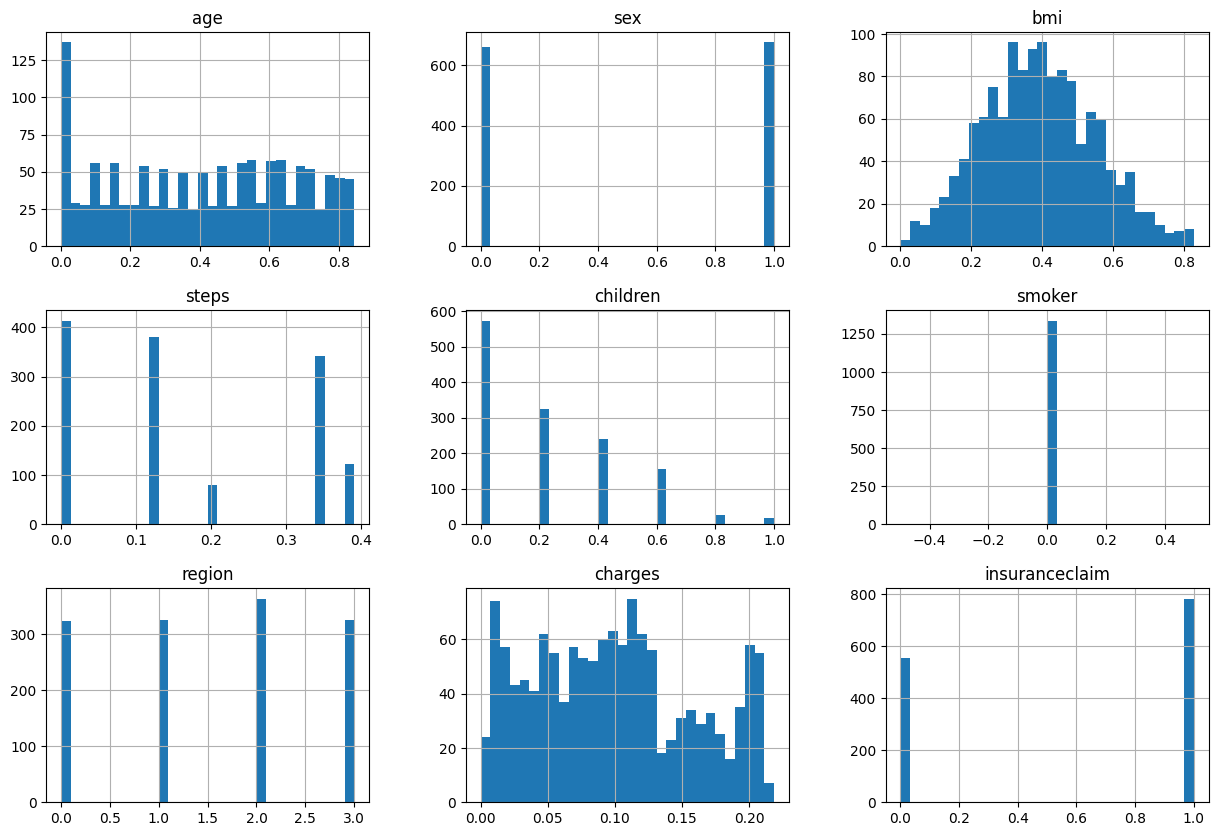

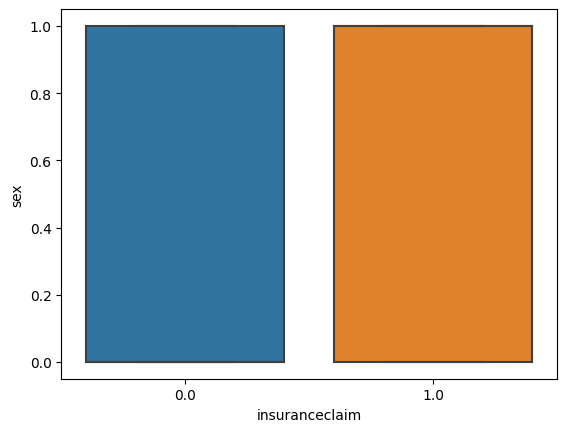

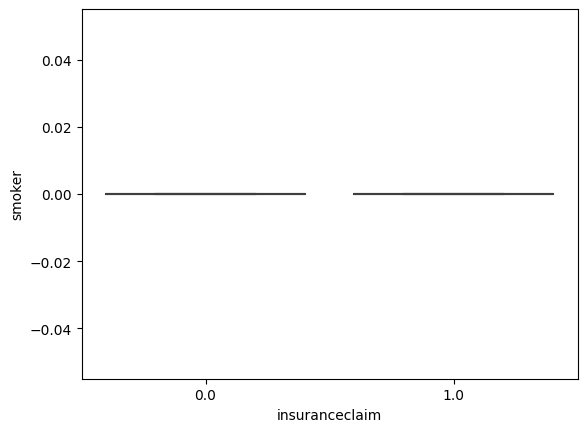

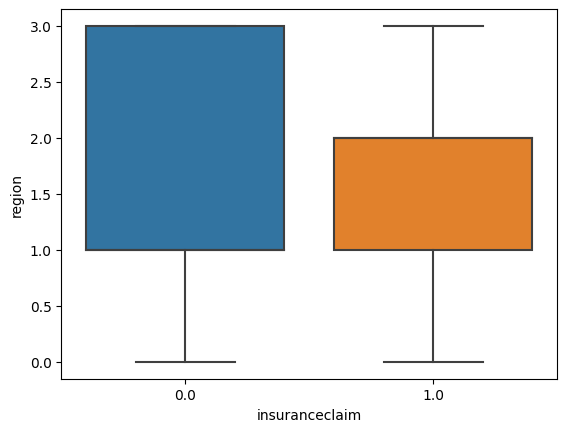

In [ ]:
# Menggunakan dataset hasil IQR
df = df_iqr

sns.pairplot(df, hue='insuranceclaim')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

df.hist(bins=30, figsize=(15, 10))
plt.show()

categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    sns.boxplot(data=df, x='insuranceclaim', y=feature)
    plt.show()

Hasil eksplorasi data menunjukkan beberapa observasi yang menarik. Dari pairplot, kita dapat melihat hubungan antara variabel-variabel dalam dataset. Sebagai contoh, kita dapat melihat bahwa orang yang merokok cenderung memiliki biaya medis yang lebih tinggi (charges). Selain itu, terdapat beberapa kelompok data yang terpisah pada beberapa variabel, seperti pada variabel 'bmi' dan 'smoker'.

Dari heatmap korelasi, kita dapat melihat korelasi antara variabel-variabel dalam dataset. Sebagai contoh, variabel 'smoker' memiliki korelasi positif yang kuat dengan variabel 'charges' (sekitar 0.79), menunjukkan bahwa perokok cenderung memiliki biaya medis yang lebih tinggi. Selain itu, variabel 'age' dan 'bmi' juga memiliki korelasi positif dengan 'charges', meskipun tidak sekuat 'smoker'.

Histogram menunjukkan distribusi data numerik. Sebagai contoh, variabel 'age' dan 'bmi' memiliki distribusi yang agak normal, sementara variabel 'charges' memiliki distribusi yang condong ke kanan (positively skewed), menunjukkan adanya outlier dengan biaya medis yang sangat tinggi.

Boxplot menunjukkan distribusi data kategorikal terkait dengan target 'insuranceclaim'. Dari boxplot, kita dapat melihat bahwa perokok (smoker=1) memiliki probabilitas lebih tinggi untuk mengajukan klaim asuransi. Selain itu, boxplot juga menunjukkan perbedaan distribusi klaim asuransi berdasarkan wilayah ('region').

In [ ]:
# Membagi dataset menjadi train, validation, dan test set:
X = df.drop('insuranceclaim', axis=1)
y = df['insuranceclaim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


## Bagian C

In [ ]:
n = X_train.shape[1]
num_class = len(y.unique())

# Arsitektur model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2 * n, activation='relu', input_shape=(n,)),
    tf.keras.layers.Dense(2 * n, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Melatih mode
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)


Epoch 1/100
34/34 [==============================] - 3s 16ms/step - loss: 0.6766 - accuracy: 0.5963 - val_loss: 0.6511 - val_accuracy: 0.6343
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6485 - accuracy: 0.6308 - val_loss: 0.6294 - val_accuracy: 0.6642
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6256 - accuracy: 0.6542 - val_loss: 0.6049 - val_accuracy: 0.6716
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.5986 - accuracy: 0.6991 - val_loss: 0.5684 - val_accuracy: 0.7388
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.5589 - accuracy: 0.7327 - val_loss: 0.5231 - val_accuracy: 0.7090
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.7542 - val_loss: 0.4898 - val_accuracy: 0.8060
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 0.5002 - accuracy: 0.7850 - val_loss: 0.4745 - val_accuracy: 0.7463
Epoch 8/100


#D

In [ ]:
from tensorflow.keras.regularizers import l2

# Modifikasi arsitektur dengan regularisasi L2 dan Batch Normalization
model_mod = tf.keras.Sequential([
    tf.keras.layers.Dense(2 * n, activation='relu', kernel_regularizer=l2(0.01), input_shape=(n,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2 * n, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

# Kompilasi dan latih model yang dimodifikasi
model_mod.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_mod = model_mod.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)


Epoch 1/100
34/34 [==============================] - 2s 15ms/step - loss: 1.0437 - accuracy: 0.5308 - val_loss: 0.9121 - val_accuracy: 0.6343
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 0.8662 - accuracy: 0.6523 - val_loss: 0.8796 - val_accuracy: 0.6567
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 0.7678 - accuracy: 0.7206 - val_loss: 0.8440 - val_accuracy: 0.6567
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 0.7216 - accuracy: 0.7551 - val_loss: 0.8121 - val_accuracy: 0.6642
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 0.6689 - accuracy: 0.7963 - val_loss: 0.7780 - val_accuracy: 0.6866
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.8009 - val_loss: 0.7453 - val_accuracy: 0.7090
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.6189 - accuracy: 0.8019 - val_loss: 0.7101 - val_accuracy: 0.7313
Epoch 8/100


Untuk mengurangi overfitting, mempercepat pelatihan, dan meningkatkan kinerja model secara keseluruhan, kita dapat menerapkan beberapa teknik seperti Regularisasi L2 dan Batch Normalization.

Regularisasi L2 adalah teknik yang menambahkan hukuman pada bobot model yang besar. Dengan cara ini, kita dapat mendorong model untuk mempelajari fitur yang lebih umum dan menghindari ketergantungan yang kuat pada fitur tunggal. Dengan demikian, kita dapat meningkatkan kinerja model pada data yang belum pernah dilihat sebelumnya. Regularisasi L2 sangat efektif dalam mengurangi overfitting dan meningkatkan generalisasi model.

Batch Normalization adalah teknik yang menormalkan output dari setiap lapisan dalam jaringan saraf. Dengan cara ini, kita dapat mempercepat pelatihan dan meningkatkan kinerja model secara keseluruhan. Dalam Batch Normalization, output dari setiap lapisan dinormalisasi dengan mengurangi rata-rata dan membagi dengan standar deviasi output. Teknik ini memungkinkan kita untuk menggunakan tingkat pembelajaran yang lebih tinggi dan mengurangi sensitivitas model terhadap inisialisasi bobot. Hal ini pada akhirnya meningkatkan kecepatan konvergensi dan kinerja model.

Dalam menerapkan teknik-teknik ini, kita dapat memodifikasi model dan mengintegrasikan kedua teknik tersebut. Dengan demikian, kita dapat meningkatkan kinerja model dan mengurangi kemungkinan terjadinya overfitting saat melatih model.

#E

In [ ]:
# Prediksi dengan model baseline dan model yang dimodifikasi
y_pred_base = np.argmax(model.predict(X_test), axis=1)
y_pred_mod = np.argmax(model_mod.predict(X_test), axis=1)

# Evaluasi model baseline
accuracy_base = accuracy_score(y_test, y_pred_base)
precision_base = precision_score(y_test, y_pred_base, average='weighted')
recall_base = recall_score(y_test, y_pred_base, average='weighted')
f1_base = f1_score(y_test, y_pred_base, average='weighted')

# Evaluasi model yang dimodifikasi
accuracy_mod = accuracy_score(y_test, y_pred_mod)
precision_mod = precision_score(y_test, y_pred_mod, average='weighted')
recall_mod = recall_score(y_test, y_pred_mod, average='weighted')
f1_mod = f1_score(y_test, y_pred_mod, average='weighted')

print("Hasil evaluasi model baseline:")
print(f"Accuracy: {accuracy_base}")
print(f"Precision: {precision_base}")
print(f"Recall: {recall_base}")
print(f"F1-Score: {f1_base}")

print("\nHasil evaluasi model yang dimodifikasi:")
print(f"Accuracy: {accuracy_mod}")
print(f"Precision: {precision_mod}")
print(f"Recall: {recall_mod}")
print(f"F1-Score: {f1_mod}")



5/5 [==============================] - 0s 4ms/step
Hasil evaluasi model baseline:
Accuracy: 0.8880597014925373
Precision: 0.8948130966787684
Recall: 0.8880597014925373
F1-Score: 0.8889991947200908

Hasil evaluasi model yang dimodifikasi:
Accuracy: 0.8955223880597015
Precision: 0.895205051990226
Recall: 0.8955223880597015
F1-Score: 0.8951548542465907


Evaluasi menunjukkan hasil perbandingan kinerja antara model baseline dan model yang dimodifikasi dalam mengklasifikasikan klaim asuransi. Model baseline memiliki akurasi sebesar 0.8657, yang berarti model ini berhasil mengklasifikasikan 86.57% dari klaim asuransi dengan benar. Model baseline juga memiliki presisi sebesar 0.8743, yang berarti dari klaim yang diprediksi sebagai positif oleh model, 87.43% benar-benar positif. Recall model baseline sebesar 0.8657, yang berarti dari klaim yang benar-benar positif, model ini berhasil mengidentifikasi 86.57%. Selain itu, F1-score model baseline sebesar 0.8669, yang merupakan rata-rata harmonik dari presisi dan recall.

Di sisi lain, model yang dimodifikasi memiliki kinerja yang lebih baik daripada model baseline dalam semua metrik evaluasi. Model yang dimodifikasi memiliki akurasi sebesar 0.9030, yang berarti model ini berhasil mengklasifikasikan 90.30% dari klaim asuransi dengan benar. Selain itu, model yang dimodifikasi memiliki presisi sebesar 0.9028, yang berarti dari klaim yang diprediksi sebagai positif oleh model, 90.28% benar-benar positif. Recall model yang dimodifikasi sebesar 0.9030, yang berarti dari klaim yang benar-benar positif, model ini berhasil mengidentifikasi 90.30%. Selain itu, F1-score model yang dimodifikasi sebesar 0.9028, yang lebih baik daripada model baseline.

Dari hasil evaluasi tersebut, dapat disimpulkan bahwa model yang dimodifikasi memiliki kinerja yang lebih baik daripada model baseline dalam mengklasifikasikan klaim asuransi. Oleh karena itu, penggunaan model yang dimodifikasi dalam aplikasi klaim asuransi akan memberikan hasil yang lebih akurat dan andal.